In [114]:
import random
import pandas as pd
import matplotlib.pyplot as plt

def roll_die(sides):
    if sides == 100:
        return random.randint(0, 99)
    else:
        return random.randint(1, sides)

def roll_dice(row, num_die, sides):
    total = 0
    for die in range(num_die):
        total += roll_die(sides)
    
    return total

def roll_dice_advantage(row, num_die, sides):
    roll_one = roll_dice(row, num_die, sides)
    roll_two = roll_dice(row, num_die, sides)

    return max(roll_one, roll_two)

def roll_dice_disadvantage(row, num_die, sides):
    roll_one = roll_dice(row, num_die, sides)
    roll_two = roll_dice(row, num_die, sides)

    return min(roll_one, roll_two)

In [115]:
df = pd.DataFrame(index=range(1000000))

df['ignore'] = 0
df['1d100'] = df.apply(roll_dice, num_die=1, sides=100, axis='columns')
df['1d100[+]'] = df.apply(roll_dice_advantage, num_die=1, sides=100, axis='columns')
df['1d100[-]'] = df.apply(roll_dice_disadvantage, num_die=1, sides=100, axis='columns')
df.drop('ignore', axis=1, inplace=True)

In [116]:
total_dice = 4

for die in range(1, total_dice+1):
    df[f"{die}d10"] = df.apply(roll_dice, num_die=die, sides=10, axis='columns')
    df[f"{die}d10[+]"] = df.apply(roll_dice_advantage, num_die=die, sides=10, axis='columns')
    df[f"{die}d10[-]"] = df.apply(roll_dice_disadvantage, num_die=die, sides=10, axis='columns')

In [117]:
df['d20'] = df.apply(roll_dice, num_die=die, sides=20, axis='columns')
df['d20[+]'] = df.apply(roll_dice_advantage, num_die=die, sides=20, axis='columns')
df['d20[-]'] = df.apply(roll_dice_disadvantage, num_die=die, sides=20, axis='columns')

In [118]:
df.describe()

,1d100,1d100[+],1d100[-],1d10,1d10[+],1d10[-],2d10,2d10[+],2d10[-],3d10,3d10[+],3d10[-],4d10,4d10[+],4d10[-],d20,d20[+],d20[-]
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,49.555641,66.202511,32.848503,5.496281,7.153939,3.847849,10.996997,13.318628,8.678107,16.503565,19.326952,13.674018,21.996222,25.257609,18.740809,42.004198,48.548151,35.464110
std,28.842241,23.547673,23.573040,2.869797,2.350876,2.352692,4.056809,3.335624,3.338470,4.976875,4.094461,4.095677,5.747909,4.731321,4.731518,11.532617,9.498407,9.487422
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,3.000000,4.000000,3.000000,4.000000,5.000000,4.000000,4.000000,11.000000,4.000000
25%,25.000000,50.000000,13.000000,3.000000,6.000000,2.000000,8.000000,11.000000,6.000000,13.000000,17.000000,11.000000,18.000000,22.000000,15.000000,34.000000,42.000000,29.000000
50%,50.000000,70.000000,29.000000,5.000000,8.000000,3.000000,11.000000,13.000000,9.000000,17.000000,19.000000,14.000000,22.000000,25.000000,19.000000,42.000000,49.000000,35.000000
75%,75.000000,86.000000,50.000000,8.000000,9.000000,5.000000,14.000000,16.000000,11.000000,20.000000,22.000000,16.000000,26.000000,29.000000,22.000000,50.000000,55.000000,42.000000
max,99.000000,99.000000,99.000000,10.000000,10.000000,10.000000,20.000000,20.000000,20.000000,30.000000,30.000000,30.000000,40.000000,40.000000,38.000000,80.000000,80.000000,75.000000


array([[<AxesSubplot:title={'center':'1d100'}>,
        <AxesSubplot:title={'center':'1d100[+]'}>,
        <AxesSubplot:title={'center':'1d100[-]'}>,
        <AxesSubplot:title={'center':'1d10'}>],
       [<AxesSubplot:title={'center':'1d10[+]'}>,
        <AxesSubplot:title={'center':'1d10[-]'}>,
        <AxesSubplot:title={'center':'2d10'}>,
        <AxesSubplot:title={'center':'2d10[+]'}>],
       [<AxesSubplot:title={'center':'2d10[-]'}>,
        <AxesSubplot:title={'center':'3d10'}>,
        <AxesSubplot:title={'center':'3d10[+]'}>,
        <AxesSubplot:title={'center':'3d10[-]'}>],
       [<AxesSubplot:title={'center':'4d10'}>,
        <AxesSubplot:title={'center':'4d10[+]'}>,
        <AxesSubplot:title={'center':'4d10[-]'}>,
        <AxesSubplot:title={'center':'d20'}>],
       [<AxesSubplot:title={'center':'d20[+]'}>,
        <AxesSubplot:title={'center':'d20[-]'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

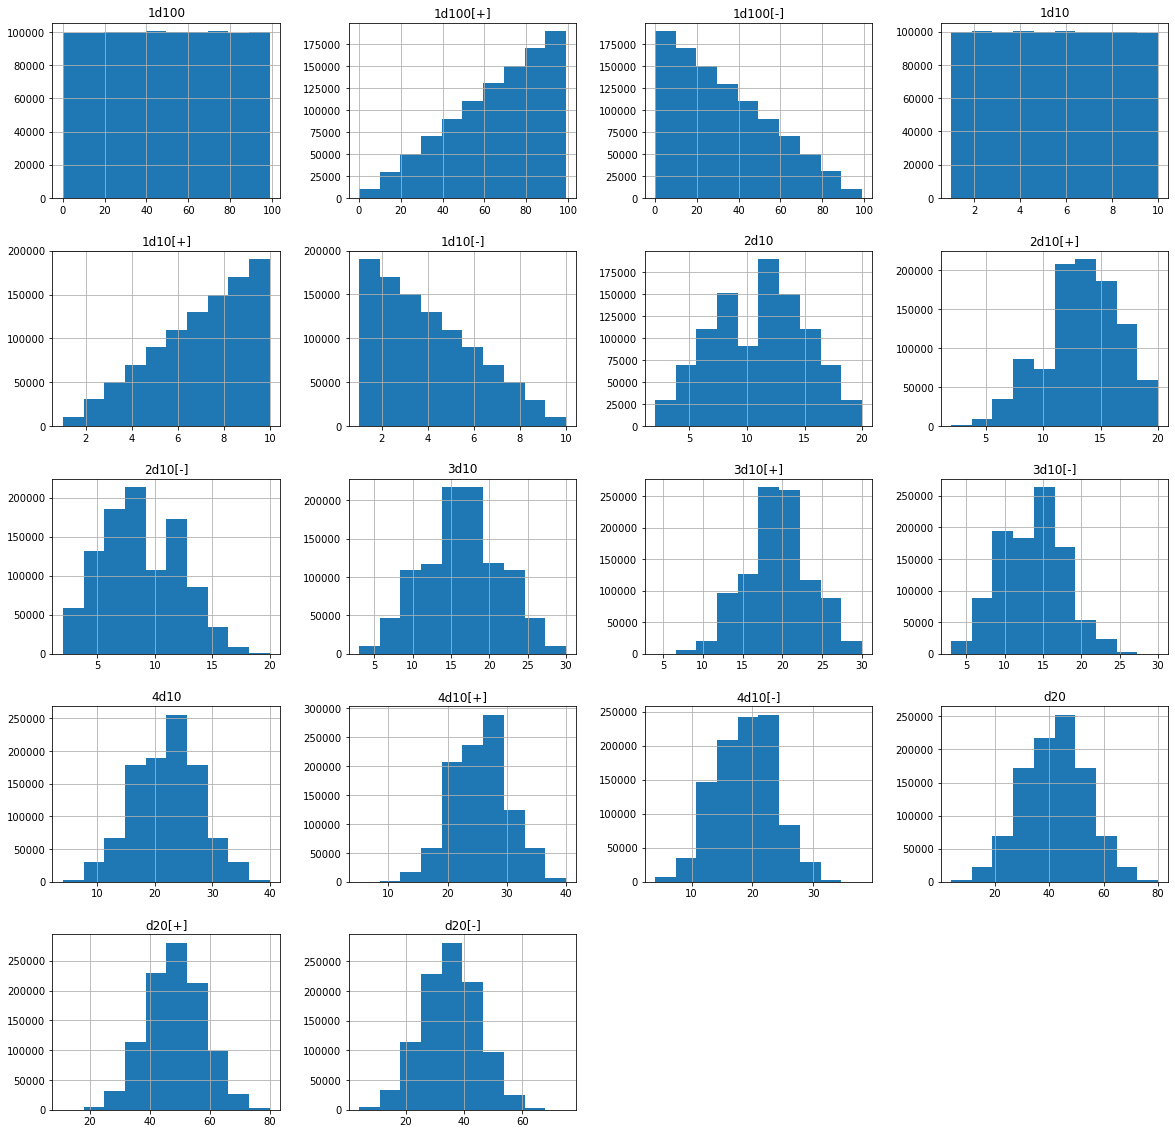

In [119]:
df.hist(figsize=(20, 20))